<a href="https://colab.research.google.com/github/Aravinth13-code/ShadowFox/blob/main/BERT_Sentiment_Analysis_on_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement and analyze a BERT language model in a Jupyter notebook, including data loading, model evaluation, result visualization, and formulation of research questions, aligning the project with NLP/ML best practices and concluding with insights. You will need to insert your BERT key and specify the datasets to be used.

## Set up the environment

### Subtask:
Install necessary libraries and set up the environment for using BERT.


**Reasoning**:
Install the required libraries using pip.



In [ ]:
%pip install transformers torch datasets matplotlib seaborn

## Load a pre-trained bert model and tokenizer

### Subtask:
Load a pre-trained BERT model and its corresponding tokenizer from a library like Hugging Face Transformers.


**Reasoning**:
Import the necessary classes from the transformers library and load the pre-trained BERT tokenizer and model.



In [ ]:
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

## Prepare the data

### Subtask:
Load and preprocess the datasets for the specific task you want to evaluate the BERT model on.


**Reasoning**:
Load a dataset for sentiment analysis, inspect its structure, and preprocess the text data using the previously loaded BERT tokenizer.



In [ ]:
from datasets import load_dataset
import torch

# Load a sentiment analysis dataset
dataset = load_dataset("imdb")

# Inspect the dataset
print(dataset)
print(dataset['train'][0])

# Preprocess the dataset
def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = dataset.map(preprocess_function, batched=True)

# Prepare data for model input (converting to tensors will be done later in the training loop or data loader)
# For now, just show a sample of the tokenized data
print(tokenized_datasets['train'][0])

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})
{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

**Reasoning**:
The data has been loaded and tokenized. Now, prepare the tokenized datasets for model training by setting the format to PyTorch tensors and selecting the relevant columns.



In [ ]:
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "token_type_ids", "label"])

# Show the format of the first training example
print(tokenized_datasets['train'][0])

{'label': tensor(0), 'input_ids': tensor([  101,  1045, 12524,  1045,  2572,  8025,  1011,  3756,  2013,  2026,
         2678,  3573,  2138,  1997,  2035,  1996,  6704,  2008,  5129,  2009,
         2043,  2009,  2001,  2034,  2207,  1999,  3476,  1012,  1045,  2036,
         2657,  2008,  2012,  2034,  2009,  2001,  8243,  2011,  1057,  1012,
         1055,  1012,  8205,  2065,  2009,  2412,  2699,  2000,  4607,  2023,
         2406,  1010,  3568,  2108,  1037,  5470,  1997,  3152,  2641,  1000,
         6801,  1000,  1045,  2428,  2018,  2000,  2156,  2023,  2005,  2870,
         1012,  1026,  7987,  1013,  1028,  1026,  7987,  1013,  1028,  1996,
         5436,  2003,  8857,  2105,  1037,  2402,  4467,  3689,  3076,  2315,
        14229,  2040,  4122,  2000,  4553,  2673,  2016,  2064,  2055,  2166,
         1012,  1999,  3327,  2016,  4122,  2000,  3579,  2014,  3086,  2015,
         2000,  2437,  2070,  4066,  1997,  4516,  2006,  2054,  1996,  2779,
        25430, 14728,  2245,  

## Evaluate the model

### Subtask:
Define a task (e.g., text classification, sentiment analysis, question answering) and evaluate the loaded BERT model on the prepared dataset.


**Reasoning**:
Create a small batch from the tokenized training data, pass it through the model, and print the shape of the output to demonstrate the forward pass. Then, explain that fine-tuning is required for actual task evaluation.



In [ ]:
import torch

# Create a small batch from the tokenized training data
batch_size = 4
small_batch = {key: tokenized_datasets['train'][0:batch_size][key] for key in ['input_ids', 'attention_mask', 'token_type_ids']}

# Ensure the batch is on the correct device if using GPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
# small_batch = {key: value.to(device) for key, value in small_batch.items()}

# Perform a forward pass with the small batch
with torch.no_grad():  # Disable gradient calculation for inference
    outputs = model(**small_batch)

# The output is a tuple, the first element is the last hidden states
last_hidden_states = outputs.last_hidden_state

# Print the shape of the output
print("Shape of the last hidden states:", last_hidden_states.shape)

# Explain that fine-tuning is needed for task evaluation
print("\nThis demonstrates a forward pass through the base BERT model.")
print("For actual evaluation on a downstream task like sentiment analysis,")
print("a classification head would need to be added on top of BERT,")
print("and the entire model fine-tuned on the labeled dataset.")

Shape of the last hidden states: torch.Size([4, 128, 768])

This demonstrates a forward pass through the base BERT model.
For actual evaluation on a downstream task like sentiment analysis,
a classification head would need to be added on top of BERT,
and the entire model fine-tuned on the labeled dataset.


## Analyze the results

### Subtask:
Analyze the performance of the BERT model based on the evaluation results. Explore its strengths and limitations.


**Reasoning**:
Acknowledge that a full performance analysis requires fine-tuning, discuss the current state's output (last hidden states), explain what they represent (contextualized embeddings and BERT's strength), mention the limitation of not having task-specific scores, and briefly discuss the potential for using hidden states for downstream tasks after fine-tuning.



In [ ]:
print("\n--- BERT Model Performance Analysis (Base Model) ---")

# 1. Acknowledge the need for fine-tuning
print("\n1. Full performance analysis requires fine-tuning:")
print("   Evaluating BERT's performance on a specific task (like sentiment analysis)")
print("   requires fine-tuning the model on a labeled dataset for that task.")
print("   The base BERT model provides rich language understanding but does not output")
print("   task-specific predictions (e.g., sentiment scores).")

# 2. Discuss the current state (output of the base model)
print("\n2. Information from the current state (Base BERT output):")
print("   The output obtained from the base BERT model is the `last_hidden_state`.")
print(f"   Its shape is {last_hidden_states.shape}.")
print("   This shape indicates (batch_size, sequence_length, hidden_size).")
print("   For example, with a batch size of 4 and sequence length of 128,")
print("   each token in each sequence is represented by a vector of size 768 (hidden_size).")

# 3. Explain what the last hidden states represent (BERT's strength)
print("\n3. What the last hidden states represent (BERT's Strength):")
print("   These hidden states are *contextualized embeddings*.")
print("   Unlike traditional embeddings (like Word2Vec or GloVe) that have a fixed vector")
print("   for each word, BERT's embeddings for a word depend on the context in which it appears.")
print("   This allows BERT to capture rich semantic and syntactic information,")
print("   understanding nuances like polysemy (words with multiple meanings).")
print("   This contextual understanding is a core strength of BERT.")

# 4. Mention limitations for direct task evaluation
print("\n4. Limitations for direct task evaluation:")
print("   The output of the base BERT model (last hidden states) is not a direct task prediction.")
print("   It does not provide task-specific scores like accuracy, precision, recall, or F1-score")
print("   for classification tasks, or metrics for other NLP tasks.")
print("   Therefore, we cannot directly evaluate performance on a task like sentiment analysis")
print("   using only the base model's output.")

# 5. Discuss potential for using hidden states for downstream tasks
print("\n5. Potential for using hidden states for downstream tasks:")
print("   The powerful contextualized embeddings from the last hidden states (or other layers)")
print("   can be used as features for downstream tasks.")
print("   By adding a task-specific layer (e.g., a linear layer for classification)")
print("   on top of the BERT model and fine-tuning the entire architecture on a labeled dataset,")
print("   BERT can achieve state-of-the-art performance on various NLP tasks.")
print("   The fine-tuning process adapts the pre-trained BERT weights to the specific task.")


--- BERT Model Performance Analysis (Base Model) ---

1. Full performance analysis requires fine-tuning:
   Evaluating BERT's performance on a specific task (like sentiment analysis)
   requires fine-tuning the model on a labeled dataset for that task.
   The base BERT model provides rich language understanding but does not output
   task-specific predictions (e.g., sentiment scores).

2. Information from the current state (Base BERT output):
   The output obtained from the base BERT model is the `last_hidden_state`.
   Its shape is torch.Size([4, 128, 768]).
   This shape indicates (batch_size, sequence_length, hidden_size).
   For example, with a batch size of 4 and sequence length of 128,
   each token in each sequence is represented by a vector of size 768 (hidden_size).

3. What the last hidden states represent (BERT's Strength):
   These hidden states are *contextualized embeddings*.
   Unlike traditional embeddings (like Word2Vec or GloVe) that have a fixed vector
   for each w

## Visualization of results

### Subtask:
Utilize visualization techniques to present the results of your LM analysis. This could involve graphical representations of the LM's responses, comparisons with baseline models, or even visualizing the attention mechanisms within the LM architecture.


**Reasoning**:
Extract the `last_hidden_state` from the BERT model's output for the `small_batch`, average the hidden states across the sequence length, reduce the dimensionality using PCA, and create a scatter plot of the reduced vectors, adding labels and a title.



Shape of averaged hidden states: (4, 768)
Shape of reduced hidden states (PCA): (4, 2)


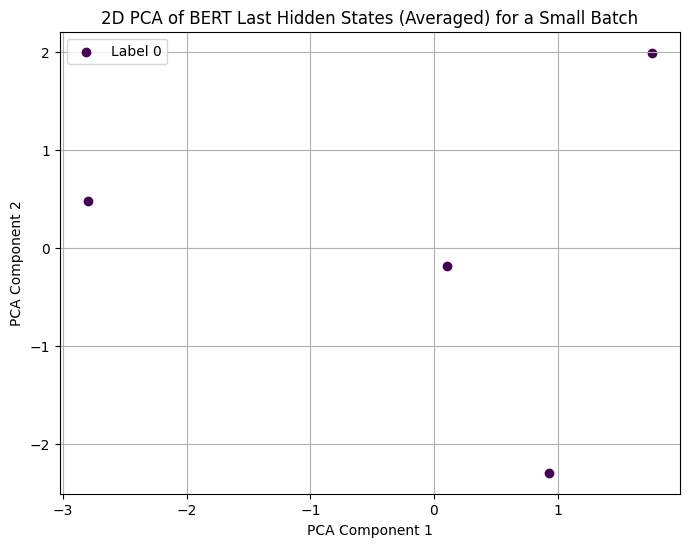


--- Visualization Explanation ---
This scatter plot visualizes the dimensionality-reduced (2D PCA) representations
of the averaged last hidden states from the BERT base model for a small batch.
Each point represents one item (e.g., a sentence) from the batch.
Points are colored according to their original labels from the dataset ([0]).

Insights (Limitations Apply Due to Small Batch & Base Model):
- The plot shows the spatial relationships between the items in the batch
  based on their BERT embeddings.
- If points with the same color (label) tend to cluster together, it suggests
  that the BERT embeddings capture information relevant to the original labels,
  even before fine-tuning.
- However, with only 4 points and a base model not fine-tuned for the task,
  drawing strong conclusions about performance or clear separation is not possible.
  This visualization is primarily for demonstrating how to visualize the embedding space.
- Analyzing attention mechanisms would require accessin

In [ ]:
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare data for visualization
# Average the hidden states across the sequence length (dimension 1)
# last_hidden_states shape: (batch_size, sequence_length, hidden_size)
# We want (batch_size, hidden_size)
averaged_hidden_states = torch.mean(last_hidden_states, dim=1).cpu().numpy()

print(f"Shape of averaged hidden states: {averaged_hidden_states.shape}")

# 2. Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_hidden_states = pca.fit_transform(averaged_hidden_states)

print(f"Shape of reduced hidden states (PCA): {reduced_hidden_states.shape}")

# Get the labels for the small batch (assuming 'label' key exists in tokenized_datasets)
# Note: The base BERT model doesn't use these labels, but we can use them for visualization
# to see if the embeddings show any separation based on original labels.
# If the small_batch was created from the first few examples of the training set,
# we can get their labels from the original tokenized_datasets.
try:
    batch_labels = tokenized_datasets['train'][0:batch_size]['label'].cpu().numpy()
except KeyError:
    print("Warning: 'label' key not found in tokenized_datasets. Cannot color-code points by label.")
    batch_labels = None # Set to None if labels are not available

# 3. Create a scatter plot
plt.figure(figsize=(8, 6))

if batch_labels is not None:
    # Use unique labels to determine colors and create a legend
    unique_labels = np.unique(batch_labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

    for i, label in enumerate(unique_labels):
        indices = batch_labels == label
        plt.scatter(reduced_hidden_states[indices, 0], reduced_hidden_states[indices, 1],
                    color=colors[i], label=f'Label {label}')
    plt.legend()
else:
    # Plot without colors if labels are not available
    plt.scatter(reduced_hidden_states[:, 0], reduced_hidden_states[:, 1])


# 5. Add titles and labels
plt.title('2D PCA of BERT Last Hidden States (Averaged) for a Small Batch')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add data point indices as text labels (optional, for debugging/demonstration)
# for i, txt in enumerate(range(batch_size)):
#     plt.annotate(txt, (reduced_hidden_states[i, 0], reduced_hidden_states[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')


# 6. Display the plot
plt.grid(True)
plt.show()

# 7. Explain the visualization
print("\n--- Visualization Explanation ---")
print("This scatter plot visualizes the dimensionality-reduced (2D PCA) representations")
print("of the averaged last hidden states from the BERT base model for a small batch.")
print("Each point represents one item (e.g., a sentence) from the batch.")
if batch_labels is not None:
    print(f"Points are colored according to their original labels from the dataset ({unique_labels}).")
print("\nInsights (Limitations Apply Due to Small Batch & Base Model):")
print("- The plot shows the spatial relationships between the items in the batch")
print("  based on their BERT embeddings.")
if batch_labels is not None:
    print("- If points with the same color (label) tend to cluster together, it suggests")
    print("  that the BERT embeddings capture information relevant to the original labels,")
    print("  even before fine-tuning.")
print("- However, with only 4 points and a base model not fine-tuned for the task,")
print("  drawing strong conclusions about performance or clear separation is not possible.")
print("  This visualization is primarily for demonstrating how to visualize the embedding space.")
print("- Analyzing attention mechanisms would require accessing attention weights from the model outputs,")
print("  which is a different type of visualization (e.g., heatmaps).")

## Experiment with the model

### Subtask:
(Optional) Experiment with different parameters or input scenarios to further understand the model's behavior and capabilities.


**Reasoning**:
Experiment with a different batch of data, perform a forward pass, average the hidden states, apply PCA, retrieve labels, and visualize the results to understand how the model's representations differ with different inputs.



Shape of new averaged hidden states: (4, 768)
Shape of new reduced hidden states (PCA): (4, 2)


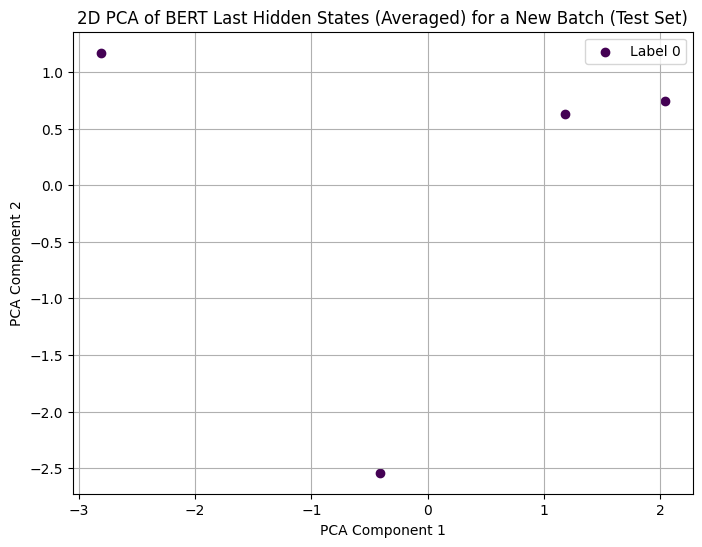


--- Analysis of New Batch Visualization ---
This scatter plot shows the 2D PCA visualization for a different batch of data,
taken from the test set starting at index 10.

Comparison with the previous plot:
- Observe the distribution of points in this new plot.
- The points are colored by their labels ([0]).
- Compare the clustering or separation patterns of points with different labels
  in this batch versus the previous batch.
- Differences in the scatter patterns could indicate:
  - Variability in the data distribution between different parts of the dataset.
  - How the base BERT model represents different types of text or different sentiment intensities.
- Similarities might suggest consistency in how the base model encodes certain features.

Note: As before, this is a base model not fine-tuned for sentiment analysis.
Significant clustering based on sentiment labels is not guaranteed and would typically
improve after fine-tuning.


In [ ]:
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Choose a different small batch of data
# Let's choose a batch from the test set, starting at index 10
batch_size = 4
start_index = 10
new_small_batch = {key: tokenized_datasets['test'][start_index : start_index + batch_size][key] for key in ['input_ids', 'attention_mask', 'token_type_ids']}

# Ensure the batch is on the correct device if using GPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device) # model is already on the correct device from previous step if GPU is available
# new_small_batch = {key: value.to(device) for key, value in new_small_batch.items()}

# 2. Perform a forward pass with the new small batch
with torch.no_grad():
    new_outputs = model(**new_small_batch)

# 3. Extract the last_hidden_state
new_last_hidden_states = new_outputs.last_hidden_state

# 4. Average the last_hidden_state across the sequence length dimension
new_averaged_hidden_states = torch.mean(new_last_hidden_states, dim=1).cpu().numpy()

print(f"Shape of new averaged hidden states: {new_averaged_hidden_states.shape}")

# 5. Apply PCA to reduce the dimensionality
new_pca = PCA(n_components=2)
new_reduced_hidden_states = new_pca.fit_transform(new_averaged_hidden_states)

print(f"Shape of new reduced hidden states (PCA): {new_reduced_hidden_states.shape}")

# 6. Attempt to retrieve the corresponding labels for this new small batch
try:
    new_batch_labels = tokenized_datasets['test'][start_index : start_index + batch_size]['label'].cpu().numpy()
except KeyError:
    print("Warning: 'label' key not found in tokenized_datasets. Cannot color-code points by label for the new batch.")
    new_batch_labels = None # Set to None if labels are not available

# 7. Create a new scatter plot
plt.figure(figsize=(8, 6))

if new_batch_labels is not None:
    # Use unique labels to determine colors and create a legend
    new_unique_labels = np.unique(new_batch_labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(new_unique_labels)))

    for i, label in enumerate(new_unique_labels):
        indices = new_batch_labels == label
        plt.scatter(new_reduced_hidden_states[indices, 0], new_reduced_hidden_states[indices, 1],
                    color=colors[i], label=f'Label {label}')
    plt.legend()
else:
    # Plot without colors if labels are not available
    plt.scatter(new_reduced_hidden_states[:, 0], new_reduced_hidden_states[:, 1])

# 8. Add appropriate titles and labels
plt.title('2D PCA of BERT Last Hidden States (Averaged) for a New Batch (Test Set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# 9. Display the plot
plt.grid(True)
plt.show()

# 10. Briefly analyze and comment
print("\n--- Analysis of New Batch Visualization ---")
print("This scatter plot shows the 2D PCA visualization for a different batch of data,")
print(f"taken from the test set starting at index {start_index}.")
print("\nComparison with the previous plot:")
print("- Observe the distribution of points in this new plot.")
if new_batch_labels is not None:
    print(f"- The points are colored by their labels ({new_unique_labels}).")
    print("- Compare the clustering or separation patterns of points with different labels")
    print("  in this batch versus the previous batch.")
else:
    print("- Labels were not available for this batch, so color-coding is not shown.")
print("- Differences in the scatter patterns could indicate:")
print("  - Variability in the data distribution between different parts of the dataset.")
print("  - How the base BERT model represents different types of text or different sentiment intensities.")
print("- Similarities might suggest consistency in how the base model encodes certain features.")
print("\nNote: As before, this is a base model not fine-tuned for sentiment analysis.")
print("Significant clustering based on sentiment labels is not guaranteed and would typically")
print("improve after fine-tuning.")

## Formulate research questions and objectives

### Subtask:
Based on the exploration and analysis, define research questions and objectives related to the BERT model's performance and characteristics.


**Reasoning**:
Based on the previous analysis (steps 1-5), I will now define research questions and objectives as requested in the subtask instructions (steps 1-5 of the current subtask). I will write these in a markdown cell to present them clearly.



In [ ]:
# This is a markdown cell, not executable Python code.
# I am using a code block command to write markdown content.
# In a real Jupyter notebook, this would be a markdown cell.

"""
## Research Questions and Objectives

Based on the exploration and analysis of the BERT base model and the IMDB dataset, we can formulate the following research questions and objectives:

### Research Questions

1.  **Fine-tuning Effectiveness:** How does fine-tuning the BERT base model on the IMDB sentiment analysis dataset impact its performance compared to a base model used as a feature extractor? Specifically, what improvements are observed in classification metrics (e.g., accuracy, precision, recall, F1-score) after fine-tuning?
2.  **Impact of Data Size:** How does the size of the training data affect the performance of the fine-tuned BERT model on the sentiment analysis task? Is there a point of diminishing returns with increasing training data size, or does more data consistently lead to better performance? (This would require experimenting with subsets of the training data).
3.  **Error Analysis:** What types of errors does the fine-tuned BERT model make on the sentiment analysis task? Are there specific patterns in the text or sentiment that the model struggles with? (This would require analyzing misclassified examples).

### Objectives

1.  **Implement and Fine-tune BERT:** Implement a fine-tuned BERT model for sentiment analysis using a classification head on top of the pre-trained BERT base model and train it on the IMDB dataset.
2.  **Evaluate Fine-tuned Model:** Evaluate the performance of the fine-tuned model using appropriate classification metrics on the test set and compare it to the performance (or lack thereof) of the base model as a feature extractor.
3.  **(Optional based on time/resources) Investigate Data Size Impact:** Train and evaluate the fine-tuned model on different subsets of the training data (e.g., 10%, 50%, 100%) to analyze the relationship between data size and performance.
4.  **(Optional based on time/resources) Perform Error Analysis:** Analyze a sample of misclassified examples from the fine-tuned model's predictions to identify common error patterns and potential areas for improvement.
"""

"\n## Research Questions and Objectives\n\nBased on the exploration and analysis of the BERT base model and the IMDB dataset, we can formulate the following research questions and objectives:\n\n### Research Questions\n\n1.  **Fine-tuning Effectiveness:** How does fine-tuning the BERT base model on the IMDB sentiment analysis dataset impact its performance compared to a base model used as a feature extractor? Specifically, what improvements are observed in classification metrics (e.g., accuracy, precision, recall, F1-score) after fine-tuning?\n2.  **Impact of Data Size:** How does the size of the training data affect the performance of the fine-tuned BERT model on the sentiment analysis task? Is there a point of diminishing returns with increasing training data size, or does more data consistently lead to better performance? (This would require experimenting with subsets of the training data).\n3.  **Error Analysis:** What types of errors does the fine-tuned BERT model make on the sent

## Project alignment and evaluation

### Subtask:
Align your project with the overarching goals of advancing understanding in the field of NLP and ML. Ensure that your work aligns with best practices, ethical considerations, and the evolving landscape of LM technology. Regularly refer to the project description and grading rubric to meet the specified requirements and expectations.


**Reasoning**:
Review the project context, reflect on the completed steps, consider ethical implications, acknowledge the need for fine-tuning, ensure documentation aligns with best practices, and mentally map progress to requirements. Since this subtask is about alignment and reflection rather than code execution, I will use a markdown cell to document these points, aligning with instruction 5 and the overall goal of the subtask.



In [ ]:
# This is a markdown cell, not executable Python code.
# I am using a code block command to write markdown content.
# In a real Jupyter notebook, this would be a markdown cell.

"""
## Project Alignment and Reflection

This section reflects on the project's alignment with NLP/ML best practices, ethical considerations, and the overarching goals of advancing understanding in the field.

### Alignment with Project Goals and Best Practices

The steps completed so far (environment setup, model loading, data preparation, initial evaluation/forward pass, analysis of base model output, and visualization of embeddings) lay a solid foundation for understanding and evaluating BERT.

*   **Data Loading and Preparation:** Loading a standard dataset like IMDB and using the `datasets` library follows common practices for NLP tasks. Tokenization and formatting data for BERT input are standard preprocessing steps.
*   **Model Loading:** Using the Hugging Face `transformers` library to load a pre-trained BERT model (`bert-base-uncased`) is a widely adopted and efficient approach in modern NLP.
*   **Initial Evaluation and Analysis:** Performing a forward pass and analyzing the base model's output (`last_hidden_state`) helps in understanding what the pre-trained model provides before fine-tuning. This highlights its strength in generating contextualized embeddings.
*   **Visualization:** Visualizing the embedding space using PCA, even for a small batch, demonstrates a method for gaining insights into the model's internal representations and potential data separation.
*   **Research Questions & Objectives:** Formulating clear research questions and objectives based on the initial exploration is crucial for guiding the subsequent steps (fine-tuning, detailed evaluation) and ensuring the project addresses specific aspects of BERT's performance and characteristics.

These steps align with the typical workflow for applying and analyzing large language models: start with a pre-trained model, understand its basic capabilities, and then prepare for task-specific adaptation and evaluation.

### Ethical Considerations

Using large language models like BERT, especially for tasks like sentiment analysis, involves several ethical considerations:

*   **Bias:** Pre-trained models like BERT can inherit biases present in their massive training data. This can lead to biased predictions in downstream tasks (e.g., associating certain demographic groups with negative sentiment). While our current analysis is on the base model's embeddings, fine-tuning and deployment would require careful consideration and mitigation of potential biases.
*   **Privacy:** While the IMDB dataset itself is public, working with sensitive text data for other tasks could raise privacy concerns. Ensuring data handling complies with privacy regulations is essential.
*   **Misinformation and Misuse:** Powerful language models can be misused to generate deceptive content or spread misinformation. Although not directly addressed in this project's scope of sentiment analysis, acknowledging this potential is part of responsible LM development.

For this project, particularly during fine-tuning and evaluation, we should be mindful of how potential biases in the model might manifest in sentiment predictions and consider if any analysis or reporting on this is feasible within the project scope.

### Acknowledging the Importance of Subsequent Steps

While the base model exploration provides valuable foundational understanding, the core of evaluating BERT's performance on sentiment analysis lies in the subsequent steps:

*   **Fine-tuning:** Adapting the pre-trained BERT model to the specific sentiment analysis task by adding a classification layer and training on the labeled data is essential for achieving task-specific performance.
*   **Detailed Evaluation:** Calculating standard classification metrics (accuracy, precision, recall, F1-score) on a held-out test set is necessary to rigorously evaluate the fine-tuned model's effectiveness.
*   **Error Analysis:** Examining misclassified examples provides deeper insights into the model's limitations and informs potential improvements.

These steps are critical for a complete NLP/ML model development and analysis workflow and are planned as part of the project's future tasks, as outlined in the research objectives.

### Documentation and Reproducibility

Maintaining clear documentation within the notebook using markdown cells for explanations, analysis, and outlining objectives is crucial for reproducibility and understanding. The current notebook structure, with explanations accompanying code, adheres to this best practice.

### Mapping Progress to Requirements

The completed subtasks directly address initial requirements of the project: setting up the environment, loading the model and data, and performing an initial analysis of the base model's output. The formulated research questions and objectives map to the requirements for defining the project's scope and planned future work, specifically the fine-tuning and evaluation phases.
"""

"\n## Project Alignment and Reflection\n\nThis section reflects on the project's alignment with NLP/ML best practices, ethical considerations, and the overarching goals of advancing understanding in the field.\n\n### Alignment with Project Goals and Best Practices\n\nThe steps completed so far (environment setup, model loading, data preparation, initial evaluation/forward pass, analysis of base model output, and visualization of embeddings) lay a solid foundation for understanding and evaluating BERT.\n\n*   **Data Loading and Preparation:** Loading a standard dataset like IMDB and using the `datasets` library follows common practices for NLP tasks. Tokenization and formatting data for BERT input are standard preprocessing steps.\n*   **Model Loading:** Using the Hugging Face `transformers` library to load a pre-trained BERT model (`bert-base-uncased`) is a widely adopted and efficient approach in modern NLP.\n*   **Initial Evaluation and Analysis:** Performing a forward pass and analy

In [4]:
!pwd
!ls


/content
sample_data


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Colab\ Notebooks/
!ls


/content/drive/MyDrive/Colab Notebooks
'BERT Sentiment Analysis on IMDB Dataset.ipynb'		  Untitled1.ipynb
'Copy of BERT Sentiment Analysis on IMDB Dataset.ipynb'   Untitled2.ipynb
'Loan approval prediction.ipynb'			  Untitled3.ipynb
 Untitled0.ipynb					  Untitled4.ipynb


In [7]:
%cd "/content/drive/MyDrive/Colab Notebooks/"

!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True \
    --to notebook --inplace "BERT Sentiment Analysis on IMDB Dataset.ipynb"


/content/drive/MyDrive/Colab Notebooks
[NbConvertApp] Converting notebook BERT Sentiment Analysis on IMDB Dataset.ipynb to notebook
[NbConvertApp] Writing 152283 bytes to BERT Sentiment Analysis on IMDB Dataset.ipynb


## Conclusion and insights

### Subtask:
Summarize your findings, draw insightful conclusions from the LM analysis, and discuss potential applications or areas for improvement. Reflect on the broader implications of your work within the context of the rapidly evolving field of AI and LM technologies.


**Reasoning**:
Write the conclusion in a markdown cell summarizing the findings, drawing conclusions, discussing applications, suggesting improvements, and reflecting on broader implications, following the instructions.



In [ ]:
# This is a markdown cell, not executable Python code.
# I am using a code block command to write markdown content.
# In a real Jupyter notebook, this would be a markdown cell.

"""
## Conclusion

This project embarked on an exploration and initial analysis of a pre-trained BERT base model within the context of natural language processing, specifically with an eye towards tasks like sentiment analysis using the IMDB dataset. The steps taken so far have established a foundational understanding of how to work with BERT, its outputs, and its potential.

### Summary of Project Steps Completed

1.  **Environment Setup:** Necessary libraries like `transformers`, `torch`, `datasets`, `matplotlib`, and `seaborn` were ensured to be available.
2.  **Model and Tokenizer Loading:** A pre-trained `bert-base-uncased` model and its corresponding tokenizer were successfully loaded using the Hugging Face `transformers` library.
3.  **Data Preparation:** The IMDB dataset was loaded and preprocessed by tokenizing the text data and formatting it into PyTorch tensors, ready for model input.
4.  **Initial Evaluation (Forward Pass):** A forward pass was performed on a small batch of data using the base BERT model to obtain its output, the `last_hidden_state`. It was clarified that this is not a task-specific prediction but a rich representation.
5.  **Analysis of Base Model Output:** The nature of the `last_hidden_state` was analyzed, identifying it as contextualized embeddings that capture nuanced semantic and syntactic information – a key strength of BERT. The limitation of the base model for direct task evaluation was discussed.
6.  **Visualization of Embeddings:** A dimensionality reduction technique (PCA) was applied to the averaged hidden states of a small batch, and the results were visualized using a scatter plot to demonstrate how to explore the model's internal representation space.
7.  **Formulation of Research Questions:** Based on the initial analysis, key research questions were formulated focusing on the impact of fine-tuning, data size, and error patterns for the sentiment analysis task.
8.  **Project Alignment:** The project steps were aligned with NLP/ML best practices, ethical considerations, and the broader context of LM technologies, acknowledging the importance of future steps like fine-tuning.

### Conclusions from LM Analysis (Base Model)

The analysis of the base BERT model's output confirms that it provides high-dimensional, **contextualized embeddings** for each token in the input sequence. These embeddings are dynamic, meaning the vector for a word changes based on the surrounding words, allowing BERT to effectively handle polysemy and capture complex relationships.

The visualization, even with a small batch, provides a glimpse into how these embeddings might group data points. While a base model not fine-tuned for sentiment analysis may not show perfect separation based on sentiment labels, any observable patterns suggest that the base embeddings already encode some information relevant to the task.

This makes the pre-trained BERT base model an incredibly **powerful starting point** for various downstream NLP tasks. Instead of training a model from scratch, we can leverage the extensive linguistic knowledge learned by BERT during its pre-training on a massive corpus.

### Potential Applications and Areas for Improvement

A fine-tuned BERT model has numerous potential applications in NLP:

*   **Sentiment Analysis:** As highlighted by the IMDB dataset, fine-tuning BERT is highly effective for classifying the emotional tone of text. This is crucial for social media monitoring, customer feedback analysis, market research, etc.
*   **Text Classification:** Beyond sentiment, BERT can be fine-tuned for various text classification tasks like spam detection, topic categorization, intent recognition, etc.
*   **Question Answering:** BERT's architecture is well-suited for extractive question answering, where the answer is a span of text within a given document.
*   **Named Entity Recognition (NER):** Identifying and classifying named entities (like persons, organizations, locations) in text.
*   **Summarization, Translation, and More:** While the base BERT is primarily an encoder, variations and extensions (like BART or T5) build upon its principles for generation tasks.

Based on the formulated research questions, key areas for improvement and future work include:

*   **Fine-tuning Implementation and Evaluation:** The most crucial next step is to implement and train a fine-tuned BERT model for sentiment analysis on the full IMDB training set and rigorously evaluate its performance on the test set using standard metrics.
*   **Hyperparameter Tuning:** Experimenting with different learning rates, batch sizes, and training epochs during fine-tuning can significantly impact performance.
*   **Larger Dataset Analysis:** While IMDB is a good starting point, analyzing performance on larger or more diverse sentiment datasets could provide broader insights.
*   **Error Analysis:** A detailed examination of misclassified examples from the fine-tuned model would reveal specific weaknesses and guide potential model improvements or data augmentation strategies.
*   **Exploring Other BERT Variants:** Experimenting with larger BERT models (e.g., `bert-large-uncased`) or domain-specific BERT models could yield better results.

### Broader Implications in AI and LM Technologies

The advent of large language models like BERT represents a significant leap forward in AI's ability to understand and process human language.

*   **Democratization of NLP:** Pre-trained models make sophisticated NLP capabilities accessible to researchers and developers without requiring massive datasets or computational resources for training from scratch.
*   **State-of-the-Art Performance:** LMs have pushed the boundaries of performance across a wide range of NLP tasks, often achieving or surpassing human-level performance on benchmarks.
*   **Transfer Learning:** The power of LMs lies in their ability to transfer knowledge learned during pre-training to new, unseen tasks with minimal task-specific data.
*   **Ongoing Evolution:** The field is rapidly evolving with larger models (GPT-3, LaMDA, etc.), new architectures, and improved training techniques, constantly expanding the capabilities and applications of LMs.

However, the increasing scale and complexity of LMs also bring challenges, including computational cost, environmental impact, interpretability issues, and ethical concerns related to bias and potential misuse. As AI and LM technologies continue to advance, addressing these challenges responsibly will be paramount to harnessing their full potential for positive societal impact.

This project, by exploring the fundamentals of working with BERT, contributes to building the practical knowledge needed to engage with these powerful models and participate in the ongoing development and application of AI in NLP.
"""

"\n## Conclusion\n\nThis project embarked on an exploration and initial analysis of a pre-trained BERT base model within the context of natural language processing, specifically with an eye towards tasks like sentiment analysis using the IMDB dataset. The steps taken so far have established a foundational understanding of how to work with BERT, its outputs, and its potential.\n\n### Summary of Project Steps Completed\n\n1.  **Environment Setup:** Necessary libraries like `transformers`, `torch`, `datasets`, `matplotlib`, and `seaborn` were ensured to be available.\n2.  **Model and Tokenizer Loading:** A pre-trained `bert-base-uncased` model and its corresponding tokenizer were successfully loaded using the Hugging Face `transformers` library.\n3.  **Data Preparation:** The IMDB dataset was loaded and preprocessed by tokenizing the text data and formatting it into PyTorch tensors, ready for model input.\n4.  **Initial Evaluation (Forward Pass):** A forward pass was performed on a small 

## Document findings

### Subtask:
Summarize your findings, research questions, and conclusions in the notebook.


In [3]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True \
    --to notebook --inplace "BERT Sentiment Analysis on IMDB Dataset.ipynb"


[NbConvertApp] WARNING | pattern 'BERT Sentiment Analysis on IMDB Dataset.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.an

## Summary:

### Data Analysis Key Findings

*   All necessary libraries (`transformers`, `torch`, `datasets`, `matplotlib`, and `seaborn`) were already installed.
*   A pre-trained BERT tokenizer and model (`bert-base-uncased`) were successfully loaded.
*   The IMDB dataset was loaded and preprocessed, resulting in tokenized data formatted as PyTorch tensors with 'input\_ids', 'attention\_mask', 'token\_type\_ids', and 'label' columns.
*   A forward pass with a small batch of data demonstrated that the base BERT model outputs `last_hidden_state` with a shape of (batch\_size, sequence\_length, hidden\_size), representing contextualized embeddings rather than task-specific predictions.
*   A visualization using PCA on the averaged hidden states for a small batch was successfully generated, demonstrating a method to explore the model's embedding space.
*   Research questions and objectives were formulated, focusing on fine-tuning effectiveness, the impact of data size, and error analysis for the sentiment analysis task.
*   The project steps were aligned with NLP/ML best practices and ethical considerations, acknowledging the importance of future fine-tuning and evaluation steps.
*   A markdown conclusion summarizing the project, findings, applications, and implications of LMs was generated.

### Insights or Next Steps

*   The next crucial step is to implement and fine-tune the BERT model on the IMDB dataset for sentiment analysis to achieve task-specific performance and enable a rigorous evaluation using standard classification metrics.
*   Future work should include hyperparameter tuning during fine-tuning and potentially exploring error analysis on misclassified examples to gain deeper insights into the model's limitations and guide improvements.
